# Calories Prediction
The dataset consists of two files: calories.csv and exercise.csv. Below is a description of each file and its columns:

1. calories.csv
* User_ID: A unique identifier for each user.
* Calories: The number of calories burned by the user.

2. exercise.csv
* User_ID: A unique identifier for each user (matches with User_ID in calories.csv).
* Gender: The gender of the user (male or female).
* Age: The age of the user in years.
* Height: The height of the user in centimeters.
* Weight: The weight of the user in kilograms.
* Duration: The duration of exercise in minutes.
* Heart_Rate: The recorded heart rate during exercise in beats per minute.
* Body_Temp: The body temperature of the user in degrees Celsius.

This dataset also contains 15,000 records with no missing values.

**Goal:**
-  Create a Regression model to predict burned Calories(y) based on other predictors.
-  How does each predictor affect the burned Calories? which X has the most effect to y?


In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

calories_df = pd.read_csv("data/calories.csv")
exercise_df = pd.read_csv("data/exercise.csv")

df = pd.merge(calories_df, exercise_df, on = 'User_ID')
df


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,12777341,44.0,female,73,158.0,63.0,9.0,87.0,39.8
1,10709573,70.0,male,46,176.0,75.0,16.0,91.0,40.5
2,19157348,173.0,female,67,163.0,59.0,25.0,107.0,40.6
3,17548410,112.0,male,24,191.0,93.0,17.0,110.0,40.5
4,10811092,211.0,female,69,169.0,67.0,29.0,111.0,40.7
...,...,...,...,...,...,...,...,...,...
14995,13625777,63.0,male,22,181.0,85.0,15.0,96.0,40.1
14996,12624213,218.0,female,48,153.0,55.0,29.0,115.0,40.8
14997,10567350,119.0,male,39,191.0,86.0,23.0,97.0,40.6
14998,18695655,5.0,male,33,187.0,83.0,2.0,82.0,38.2


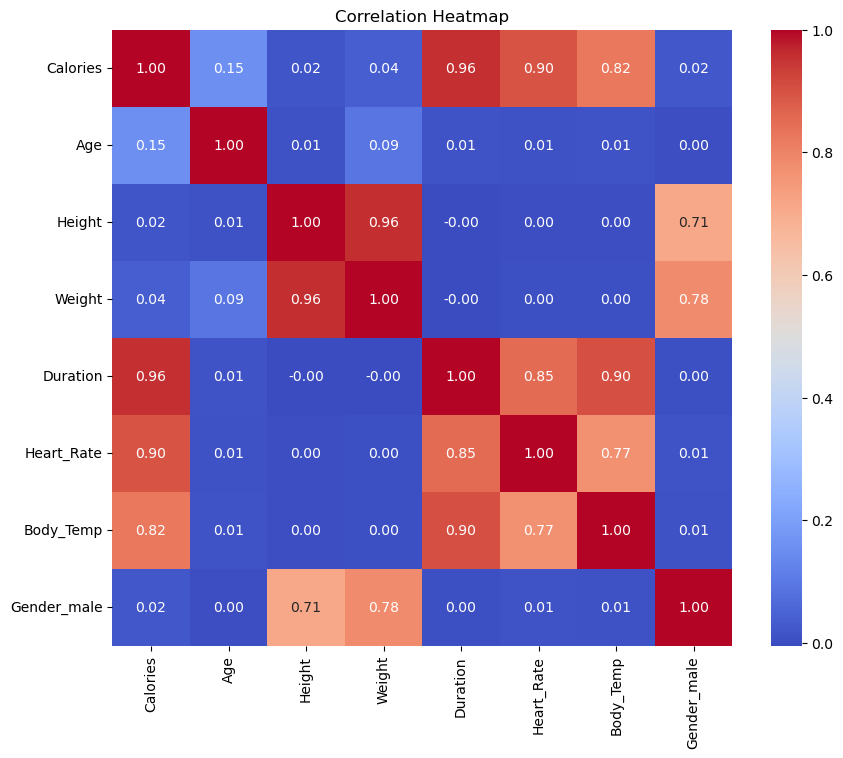

In [26]:
# Drop the user_id column
df = df.drop(columns=['User_ID'])

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

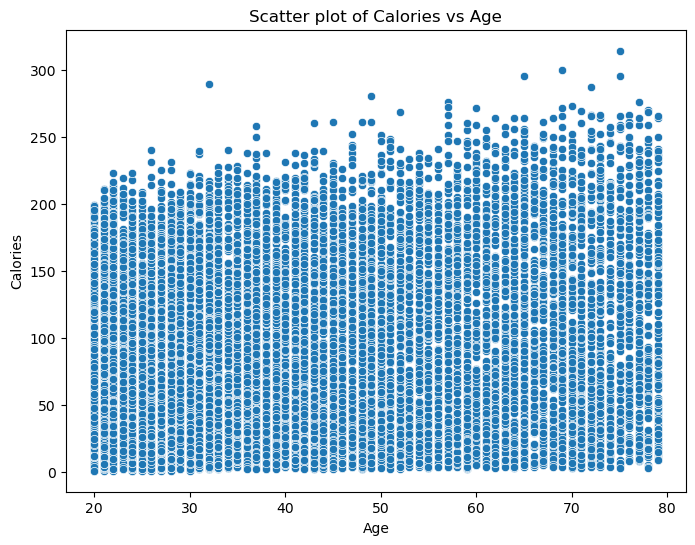

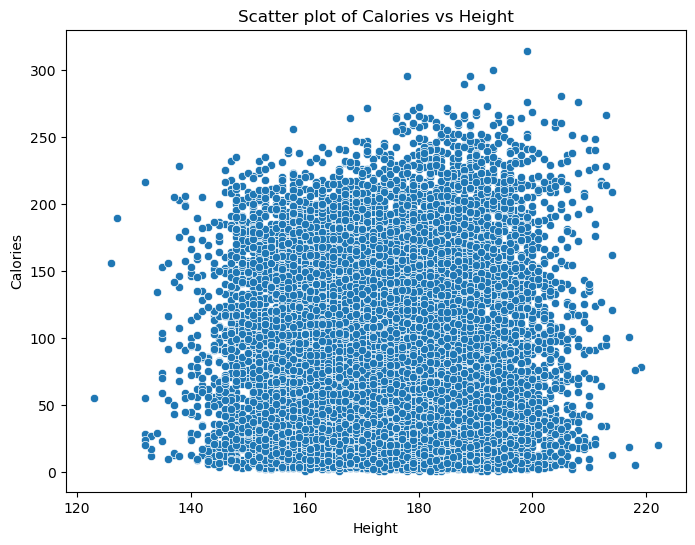

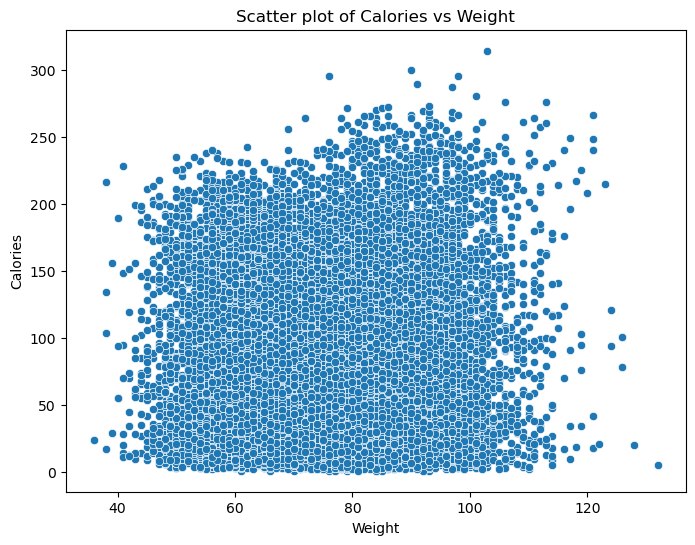

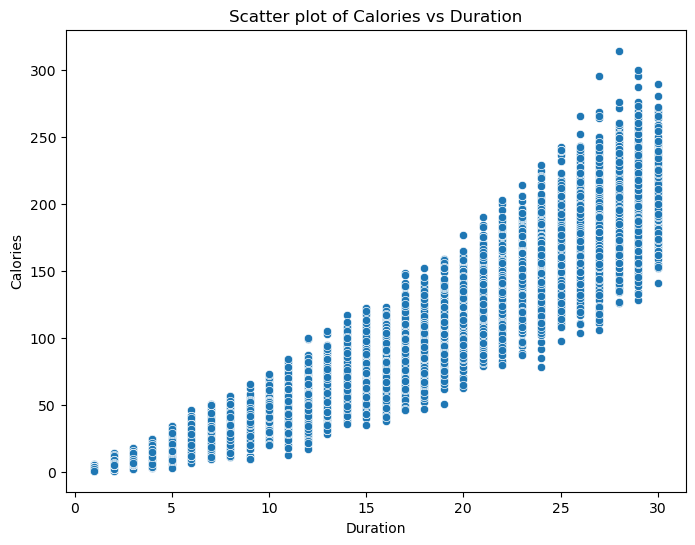

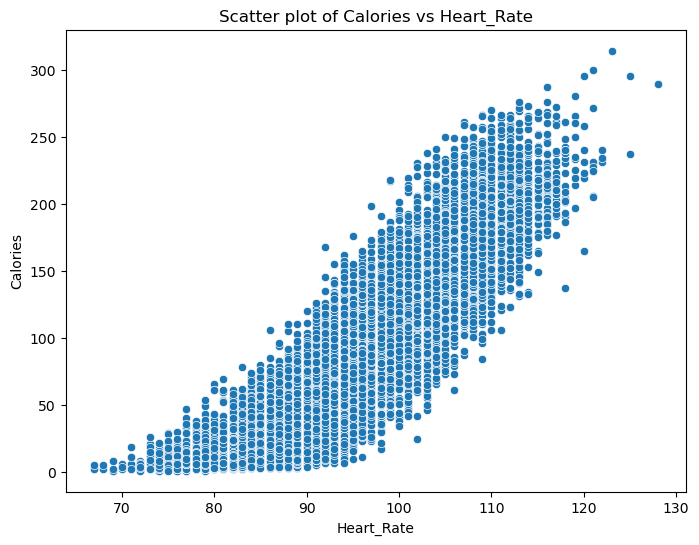

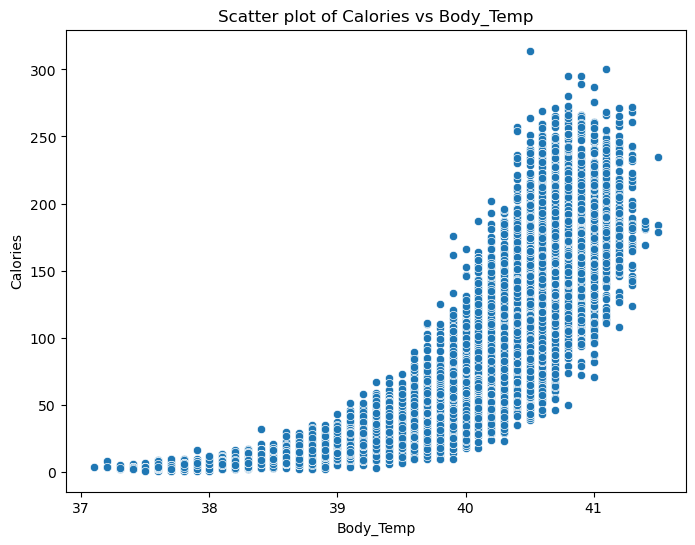

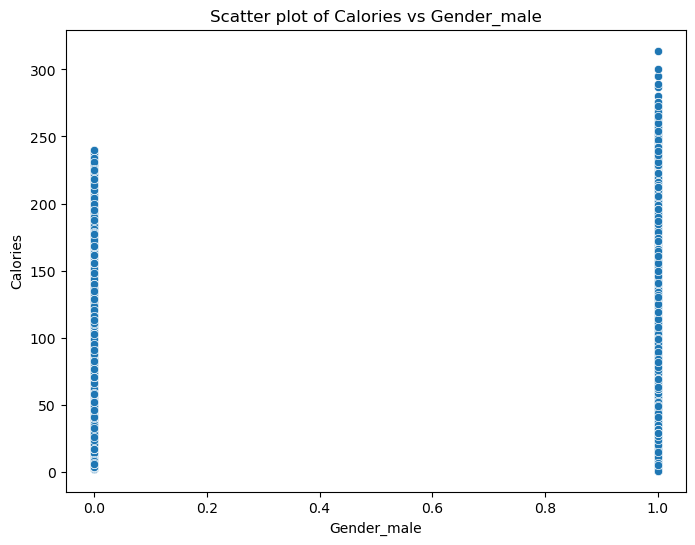

In [27]:
# List of features to plot against calories
features = df.columns.drop('Calories')

# Create scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Calories'])
    plt.title(f'Scatter plot of Calories vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV,LassoCV

X = df.drop(columns=['Calories'])
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

alpha = np.logspace(-4, 4, 100)

ridge = RidgeCV(alphas=alpha, cv=5)
ridge.fit(X_train, y_train)

lasso = LassoCV(alphas=alpha, cv=5)
lasso.fit(X_train, y_train)

ridge_mse = ridge.score(X_test, y_test)
lasso_mse = lasso.score(X_test, y_test)

print(f'Ridge MSE: {ridge_mse}')
print(f'Lasso MSE: {lasso_mse}')



Ridge MSE: 0.9681095228715075
Lasso MSE: 0.9681096910678643


In [45]:
# Create a dataframe to store the coefficients of the features
coefficients = pd.DataFrame({
    'feature': X.columns,
    'ridge_coefficient': ridge.coef_,
    'lasso_coefficient': lasso.coef_
})
print(coefficients)




       feature  ridge_coefficient  lasso_coefficient
0          Age           8.566622           8.566683
1       Height          -2.743564          -2.744986
2       Weight           4.705590           4.707292
3     Duration          54.916490          54.934721
4   Heart_Rate          19.197766          19.193464
5    Body_Temp         -13.155255         -13.168878
6  Gender_male          -0.712679          -0.712828
